In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from src.data_processing import fetch_data, calculate_indicators, fill_missing_data, scale_data
from src.model import initialize_model, train_model, evaluate_model
from sklearn.model_selection import train_test_split  # Import train_test_split directly in the notebook

In [2]:
# Step 2: Fetch and preprocess data

# Define stock tickers and fetch data
tickers = ["TUPRS.IS"]
df = fetch_data(tickers)

# Calculate technical indicators
df = calculate_indicators(df)

# Fill missing values
df = fill_missing_data(df)

# Display the first few rows of the preprocessed data
df.head()

[*********************100%***********************]  1 of 1 completed
C:\Users\Berkay\PycharmProjects\FLANN-CBDW Stock Forecast\src\data_processing.py:75: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', inplace=True)


Price,Adj Close,Close,High,Low,Open,Volume,Ticker,RSI,Short_MA,Long_MA,MAVI
Ticker,TUPRS.IS,TUPRS.IS,TUPRS.IS,TUPRS.IS,TUPRS.IS,TUPRS.IS,,,,,
Datetime,,,,,,,,,,,
2023-08-28 09:30:00+00:00,140.100006,140.100006,140.500000,135.699997,135.699997,0.0,TUPRS.IS,56.296278,4456737.8,5089794.5,0.730893
2023-08-28 10:30:00+00:00,140.100006,140.100006,142.199997,139.300003,140.100006,11607977.0,TUPRS.IS,56.296278,4456737.8,5089794.5,0.730893
2023-08-28 11:30:00+00:00,139.500000,139.500000,140.899994,139.399994,140.100006,5291555.0,TUPRS.IS,56.296278,4456737.8,5089794.5,0.730893
2023-08-28 12:30:00+00:00,139.899994,139.899994,140.300003,139.000000,139.500000,3358346.0,TUPRS.IS,56.296278,4456737.8,5089794.5,0.730893
2023-08-28 13:30:00+00:00,140.100006,140.100006,140.399994,139.699997,139.899994,2025811.0,TUPRS.IS,56.296278,4456737.8,5089794.5,0.730893


In [3]:
print(df.isnull().sum())

Price      Ticker  
Adj Close  TUPRS.IS    0
Close      TUPRS.IS    0
High       TUPRS.IS    0
Low        TUPRS.IS    0
Open       TUPRS.IS    0
Volume     TUPRS.IS    0
Ticker                 0
RSI                    0
Short_MA               0
Long_MA                0
MAVI                   0
dtype: int64


In [4]:
# Step 3: Define independent and dependent variables
X = df[['Open', 'RSI', 'MAVI', 'Long_MA']]
y = df['Adj Close']

In [5]:
# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Step 5: Scale training and testing data
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, scaler_X, scaler_y = scale_data(X_train, X_test, y_train, y_test)

In [7]:
# Step 6: Initialize and train the model
model = initialize_model()
model = train_model(model, X_train_scaled, y_train_scaled)

2024/11/04 02:03:49 AM, INFO, mealpy.swarm_based.FFA.OriginalFFA: Solving single objective optimization problem.
2024/11/04 02:04:01 AM, INFO, mealpy.swarm_based.FFA.OriginalFFA: >>>Problem: P, Epoch: 1, Current best: 0.14359121693825488, Global best: 0.14359121693825488, Runtime: 11.57087 seconds
2024/11/04 02:04:13 AM, INFO, mealpy.swarm_based.FFA.OriginalFFA: >>>Problem: P, Epoch: 2, Current best: 0.10599105097828161, Global best: 0.10599105097828161, Runtime: 11.56778 seconds
2024/11/04 02:04:24 AM, INFO, mealpy.swarm_based.FFA.OriginalFFA: >>>Problem: P, Epoch: 3, Current best: 0.10599105097828161, Global best: 0.10599105097828161, Runtime: 11.54897 seconds
2024/11/04 02:04:36 AM, INFO, mealpy.swarm_based.FFA.OriginalFFA: >>>Problem: P, Epoch: 4, Current best: 0.059167041485965126, Global best: 0.059167041485965126, Runtime: 11.47275 seconds
2024/11/04 02:04:47 AM, INFO, mealpy.swarm_based.FFA.OriginalFFA: >>>Problem: P, Epoch: 5, Current best: 0.059167041485965126, Global best: 0

In [8]:
# Step 7: Make predictions on the test set
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

In [9]:
# Step 8: Evaluate model performance
rmse, metrics = evaluate_model(model, X_test_scaled, y_test_scaled)
print("Model Performance:")
print(f" - RMSE: {rmse}")

# Print additional metrics
print("Additional Metrics:")
for metric, value in metrics.items():
    if metric == "MAPE":
        print(f" - {metric}: {value * 100:.2f}%")
    else:
        print(f" - {metric}: {value}")

Model Performance:
 - RMSE: 0.0590811145854974
Additional Metrics:
 - R2: 0.9018358653369151
 - NSE: 0.9018358653369151
 - MAPE: 15.56%
 - MAE: 0.0486300695806574


In [135]:
# Step 9: Generate Buy/Sell/Hold signals based on model predictions
def generate_buy_sell_hold_points(predictions, real_prices, threshold=0.03):
    signals = []
    
    for i in range(1, len(predictions)):
        prev_price = real_prices[i - 1]
        predicted_price = predictions[i]
        
        # Generate Buy/Sell/Hold signals based on the threshold
        if predicted_price > prev_price * (1 + threshold):
            signals.append("Buy")
        elif predicted_price < prev_price * (1 - threshold):
            signals.append("Sell")
        else:
            signals.append("Hold")
    
    return signals

# Retrieve actual prices and generate signals
real_prices = y_test.values
buy_sell_hold_points = generate_buy_sell_hold_points(y_pred, real_prices)

# Display signals
print(buy_sell_hold_points)

['Buy', 'Buy', 'Sell', 'Hold', 'Buy', 'Sell', 'Sell', 'Hold', 'Buy', 'Hold', 'Sell', 'Buy', 'Sell', 'Hold', 'Buy', 'Sell', 'Buy', 'Sell', 'Buy', 'Sell', 'Buy', 'Sell', 'Buy', 'Sell', 'Buy', 'Sell', 'Buy', 'Sell', 'Buy', 'Buy', 'Hold', 'Sell', 'Buy', 'Sell', 'Hold', 'Buy', 'Buy', 'Sell', 'Buy', 'Sell', 'Sell', 'Sell', 'Buy', 'Sell', 'Sell', 'Buy', 'Sell', 'Buy', 'Buy', 'Buy', 'Sell', 'Hold', 'Buy', 'Sell', 'Hold', 'Hold', 'Buy', 'Sell', 'Buy', 'Sell', 'Sell', 'Sell', 'Hold', 'Buy', 'Sell', 'Buy', 'Buy', 'Sell', 'Sell', 'Sell', 'Sell', 'Buy', 'Buy', 'Sell', 'Buy', 'Buy', 'Sell', 'Buy', 'Sell', 'Buy', 'Sell', 'Sell', 'Buy', 'Buy', 'Buy', 'Sell', 'Hold', 'Hold', 'Sell', 'Buy', 'Buy', 'Sell', 'Buy', 'Buy', 'Sell', 'Buy', 'Sell', 'Sell', 'Buy', 'Buy', 'Sell', 'Hold', 'Buy', 'Hold', 'Buy', 'Sell', 'Sell', 'Buy', 'Buy', 'Hold', 'Buy', 'Sell', 'Buy', 'Hold', 'Buy', 'Sell', 'Buy', 'Sell', 'Buy', 'Sell', 'Sell', 'Buy', 'Sell', 'Sell', 'Sell', 'Buy', 'Sell', 'Buy', 'Buy', 'Hold', 'Buy', 'Hold', 'S

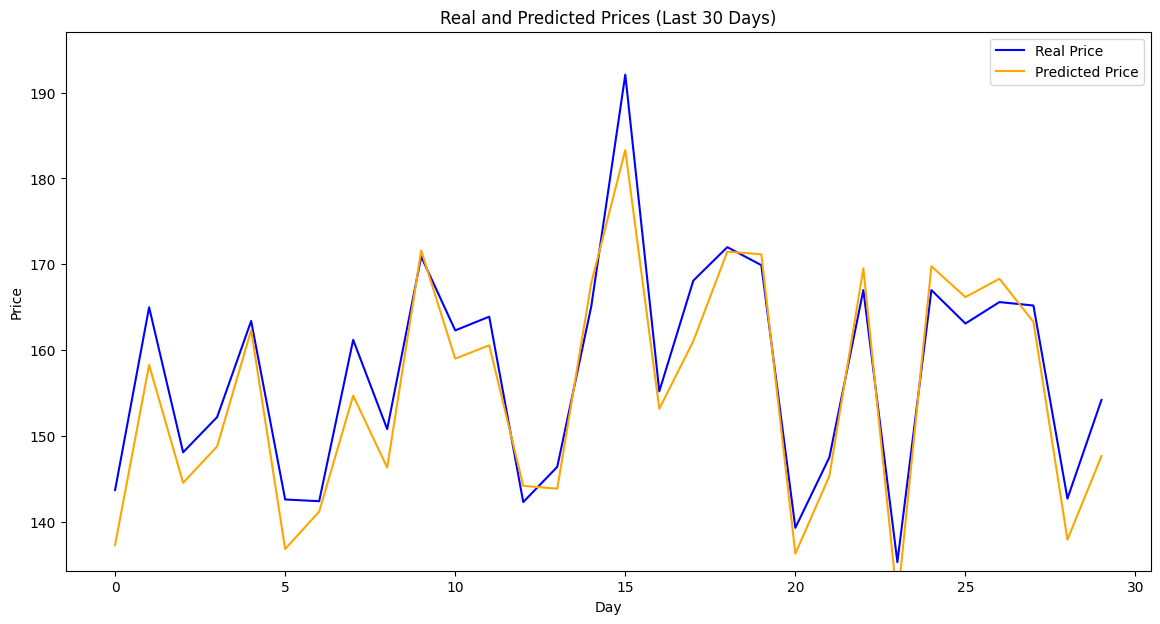

In [137]:
# Step 10: Plot Real and Predicted Prices for the Last 30 Days

def plot_prices_only(real_prices, predictions):
    plt.figure(figsize=(14, 7))
    plt.plot(real_prices[-30:], label="Real Price", color="blue")  # Last 30 days of real prices
    plt.plot(predictions[-30:], label="Predicted Price", color="orange")  # Last 30 days of predicted prices

    plt.ylim(min(real_prices[-30:]) - 1, max(real_prices[-30:]) + 5)
    plt.title("Real and Predicted Prices (Last 30 Days)")
    plt.xlabel("Day")
    plt.ylabel("Price")
    plt.legend()
    plt.show()

# Call the updated plotting function
plot_prices_only(real_prices, y_pred)


In [138]:
# Step 11: Create a results table
days = [f"Day-{i+1}" for i in range(len(buy_sell_hold_points))]

# Prepare data for the results table
output_flann = y_pred.flatten()  # FLANN predictions
output_cbdw = [None] * len(buy_sell_hold_points)  # Placeholder for CBDW output
final_decision = [None] * len(buy_sell_hold_points)  # Placeholder for final decision

# Create a DataFrame to organize the output data
df = pd.DataFrame({
    "Date": days,
    "Output FLANN": output_flann[:len(buy_sell_hold_points)],
    "From Buy/Sell Point": buy_sell_hold_points,
    "Output of CBDW": output_cbdw,
    "Final Decision": final_decision
})

# Display the first few rows of the DataFrame
df.head()

,Date,Output FLANN,From Buy/Sell Point,Output of CBDW,Final Decision
0,Day-1,138.724816,Buy,None,None
1,Day-2,166.225787,Buy,None,None
2,Day-3,171.339027,Sell,None,None
3,Day-4,149.705864,Hold,None,None
4,Day-5,153.769769,Buy,None,None


In [145]:
# Step 12: Improved Case-Based Dynamic Window (CBDW) for refining Buy/Sell predictions

# Function to calculate Euclidean distance for CBDW implementation
def calculate_euclidean_distance(window1, window2):
    return euclidean(window1, window2)

# Function to find the best matching window in past data using Euclidean distance
def cbdw_prediction(past_data, current_window, window_size=5):
    min_distance = float('inf')  # Initialize minimum distance with a large value
    best_window = None  # Variable to store the best matching window

    # Loop through past data to find the best matching window
    for i in range(len(past_data) - window_size):
        past_window = past_data[i:i + window_size]  # Extract a window from past data
        distance = np.linalg.norm(past_window - current_window)  # Calculate distance

        # Update the best window if current distance is smaller than the minimum distance
        if distance < min_distance:
            min_distance = distance
            best_window = past_window

    # Predict the next value based on the best matching window
    if best_window is not None:
        next_index = np.where(past_data == best_window[-1])[0][0] + 1  # Find next value index
        if next_index < len(past_data):
            return past_data[next_index]
    
    return None  # Return None if no prediction can be made

# Function to generate CBDW predictions for the entire dataset
def generate_cbdw_points(real_prices, window_size=5):
    predictions = []

    # Loop through real prices to create windows and generate predictions
    for i in range(window_size, len(real_prices)):
        current_window = real_prices[i - window_size:i]  # Create a window of current prices
        predicted_value = cbdw_prediction(real_prices[:i], current_window, window_size=window_size)  # Make prediction
        predictions.append(predicted_value)

    return predictions

# Real prices (original test set data)
real_prices = y_test.values

# Generate CBDW predictions
cbdw_predictions = generate_cbdw_points(real_prices, window_size=5)

# Ensure the DataFrame's row count matches the real prices length
if len(df) < len(real_prices):
    # Add empty rows if DataFrame is shorter
    extra_rows = pd.DataFrame(np.nan, index=range(len(df), len(real_prices)), columns=df.columns)
    df = pd.concat([df, extra_rows]).reset_index(drop=True)

# Add CBDW predictions to the DataFrame
if len(cbdw_predictions) < len(real_prices):
    cbdw_predictions = [None] * (len(real_prices) - len(cbdw_predictions)) + cbdw_predictions

df["Output of CBDW"] = cbdw_predictions

# Final decision based on FLANN and CBDW results
for i in range(len(buy_sell_hold_points)):
    if buy_sell_hold_points[i] == "Buy" or buy_sell_hold_points[i] == "Sell":
        flann_signal = buy_sell_hold_points[i]
        
        # Check for None values in cbdw_predictions
        if cbdw_predictions[i] is not None and real_prices[i] is not None:
            cbdw_signal = "Buy" if cbdw_predictions[i] > real_prices[i] else "Sell"
        else:
            cbdw_signal = None  # No action if there's no prediction
        
        # Set final decision if FLANN and CBDW agree, otherwise Hold
        if flann_signal == cbdw_signal:
            df.at[i, "Final Decision"] = flann_signal
        else:
            df.at[i, "Final Decision"] = "Hold"  # Set to Hold if signals don't match

# Display final DataFrame with CBDW outputs and final decisions
print(df[['Output of CBDW', 'Final Decision']].head())

  Output of CBDW Final Decision
0           None           Hold
1           None           Hold
2           None           Hold
3           None           None
4           None           Hold


In [146]:
# Step 13: Generate a DataFrame combining FLANN and CBDW predictions to make final Buy/Sell/Hold decisions

from scipy.spatial.distance import euclidean

# Predicted and actual prices (sample data)
y_pred = scaler_y.inverse_transform(y_pred_scaled)  # Rescale predicted prices to the original scale
real_prices = y_test.values  # Retrieve actual prices

# Determine Buy/Sell/Hold points based on predictions
buy_sell_hold_points = generate_buy_sell_hold_points(y_pred, real_prices)

# Use predicted prices as the FLANN output (y_pred)
output_flann = y_pred.flatten()  # Flatten the predicted prices

# Fill CBDW predictions with None if needed to match the length of real prices
if len(cbdw_predictions) < len(real_prices):
    cbdw_predictions = [None] * (len(real_prices) - len(cbdw_predictions)) + cbdw_predictions

# Initialize an empty list for final decisions
final_decision = [None] * len(buy_sell_hold_points)

# Calculate final decisions based on FLANN and CBDW signals
for i in range(len(buy_sell_hold_points)):
    if buy_sell_hold_points[i] in ["Buy", "Sell"]:
        flann_signal = buy_sell_hold_points[i]
        
        # Compare with CBDW prediction if available
        if cbdw_predictions[i] is not None:
            cbdw_signal = "Buy" if cbdw_predictions[i] > real_prices[i] else "Sell"
        else:
            cbdw_signal = None  # Set to None if no CBDW prediction

        # Set final decision if FLANN and CBDW signals agree
        if flann_signal == cbdw_signal:
            final_decision[i] = flann_signal
        else:
            final_decision[i] = "Hold"  # Set to Hold if signals differ

# Ensure all lists are the same length as real_prices
max_len = len(real_prices)

if len(output_flann) < max_len:
    output_flann = np.concatenate((output_flann, [None] * (max_len - len(output_flann))))
if len(buy_sell_hold_points) < max_len:
    buy_sell_hold_points = buy_sell_hold_points + [None] * (max_len - len(buy_sell_hold_points))
if len(final_decision) < max_len:
    final_decision = final_decision + [None] * (max_len - len(final_decision))
if len(cbdw_predictions) < max_len:
    cbdw_predictions = cbdw_predictions + [None] * (max_len - len(cbdw_predictions))

# Create a list of days
days = [f"Day-{i+1}" for i in range(max_len)]

# Create a DataFrame to display results
df_results = pd.DataFrame({
    "Date": days,
    "Output FLANN": output_flann[:max_len],  # FLANN predictions
    "From Buy/Sell Point": buy_sell_hold_points,  # Buy/Sell/Hold points
    "Output of CBDW": cbdw_predictions[:max_len],  # CBDW predictions
    "Final Decision": final_decision[:max_len]  # Final decisions
})

# Display the first 50 rows of the DataFrame
df_results.head(50)


,Date,Output FLANN,From Buy/Sell Point,Output of CBDW,Final Decision
0,Day-1,138.724816,Buy,None,Hold
1,Day-2,166.225787,Buy,None,Hold
2,Day-3,171.339027,Sell,None,Hold
3,Day-4,149.705864,Hold,None,None
4,Day-5,153.769769,Buy,None,Hold
5,Day-6,168.354911,Sell,None,Hold
6,Day-7,160.624388,Sell,[172.3000030517578],Hold
7,Day-8,141.548343,Hold,[160.6999969482422],None
8,Day-9,143.686008,Buy,[172.3000030517578],Buy
9,Day-10,169.164939,Hold,[172.3000030517578],None
